In [1]:
import string
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
df = pd.read_csv('..\\tweets_sentiment.csv', header=0)
text = " ".join(df.translated_text)

In [3]:
# converting to lowercase
lower_case = text.lower()

In [4]:
# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

In [5]:
# splitting text into words
tokenized_words = cleaned_text.split()

In [6]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [7]:
# Removing stop words from the tokenized words list
final_words = [word for word in tokenized_words if word not in stop_words]

In [8]:
# Get emotions text
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

In [9]:
w = Counter(emotion_list)
print(w)

Counter({' happy': 34, ' sad': 31, ' fearful': 28, ' attracted': 19, ' angry': 17, ' powerless': 17, ' attached': 11, ' fearless': 11, ' singled out': 10, ' adequate': 9, ' hated': 9, ' anxious': 9, ' entitled': 9, ' esteemed': 8, ' belittled': 8, ' cheated': 7, ' loved': 7, ' alone': 6, ' surprise': 5, ' lustful': 4, ' codependent': 4, ' embarrassed': 3, ' average': 3, ' apathetic': 3, ' obsessed': 3, ' focused': 3, ' ecstatic': 3, ' free': 3, ' bored': 2, ' safe': 2, ' lost': 2, ' burdened': 2, ' independent': 2, ' demoralized': 1, ' derailed': 1})


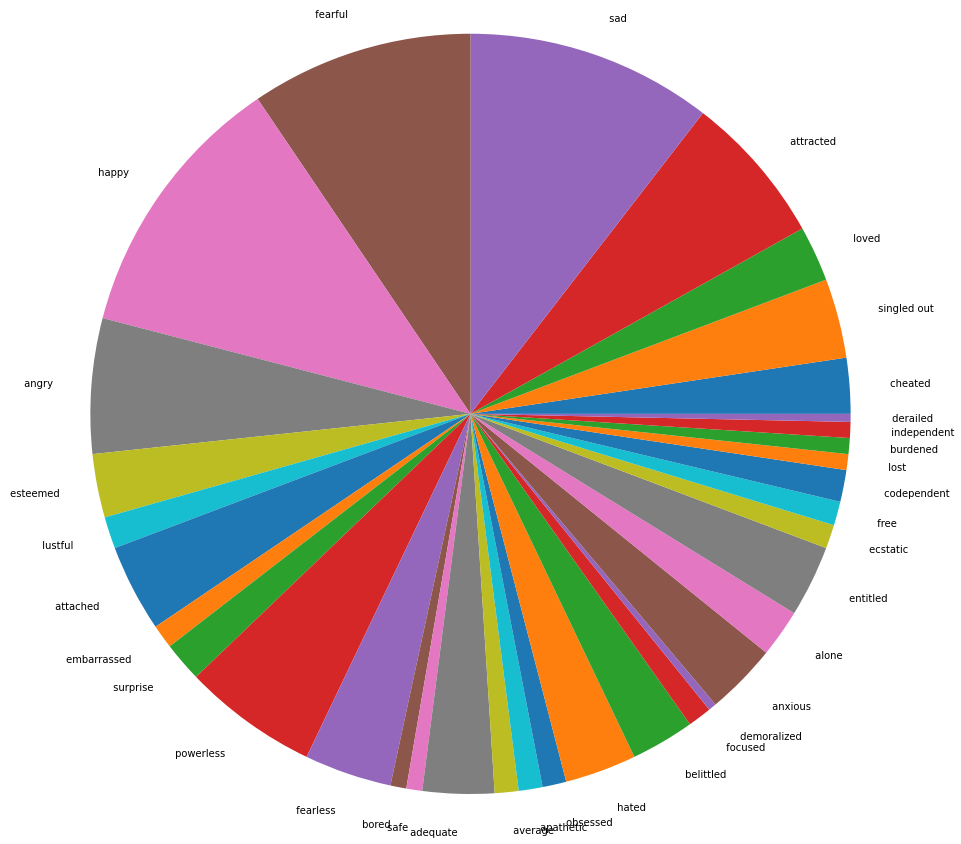

In [35]:
fig1, ax1 = plt.subplots(figsize=(15,15))
ax1.pie(w.values(), labels=w.keys())
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()